In [5]:
import pandas as pd

df = pd.read_csv("/Users/ayannoorlan/Documents/valex/call_win_lose/data/final_dataset_with_prices.csv")

In [6]:
df

id  user_id  token_id                    start  \
0      10405       14      4619  2024-01-12 20:20:23.759   
1      10406       14      4620  2024-01-12 20:42:01.441   
2      10408       14      4621  2024-01-12 21:02:33.339   
3      10409    42280      4622  2024-01-12 21:29:43.227   
4      10410    24208      4623  2024-01-13 10:15:58.080   
...      ...      ...       ...                      ...   
11025   7065      823      3078  2023-10-27 20:19:55.808   
11026   7066      279      3049  2023-10-27 21:02:38.149   
11027   7067      121      3079  2023-10-27 21:05:06.377   
11028   7068      841      3080  2023-10-27 22:29:21.299   
11029   7069     8374      3080  2023-10-27 22:29:57.699   

                        finish  user_rating_at_call  calls_before_call  \
0      2024-01-19 20:20:23.759             0.000000                0.0   
1      2024-01-19 20:42:01.441             0.000000                0.0   
2      2024-01-19 21:02:33.339             0.000000                0.0   
3      2024-01-19 21:29:43.227             0.000000                0.0   
4      2024-02-12 10:15:58.080             0.000000                0.0   
...                        ...                  ...                ...   
11025  2023-11-26 20:19:55.808             0.084125               22.0   
11026  2023-11-26 21:02:38.149             0.000000                0.0   
11027  2023-11-26 21:05:06.377             0.000000                0.0   
11028  2023-11-26 22:29:21.299             0.000000                0.0   
11029  2023-11-26 22:29:57.699             0.000000                0.0   

       overlapping_calls  average_rating_during_call   start_price  \
0                      3                    0.107365  3.963000e-03   
1                      3                    0.107365  2.263000e-01   
2                      3                    0.107365  9.408000e-08   
3                      1                    0.107389  4.112000e-08   
4                      5                    0.099736  1.169000e-03   
...                  ...                         ...           ...   
11025                 21                    0.103246  5.111000e-06   
11026                  2                    0.103179  5.226000e-04   
11027                  1                    0.103179  1.682000e-04   
11028                  8                    0.103414  2.384000e-03   
11029                  2                    0.103414  2.646000e-03   

         last_price    win  
0      1.031000e-04  False  
1      3.973000e-01  False  
2      1.199000e-07  False  
3      2.329000e-08  False  
4      5.258000e-04  False  
...             ...    ...  
11025  5.258000e-05   True  
11026  2.541000e-05  False  
11027  4.549000e-06  False  
11028  5.527000e-04  False  
11029  5.527000e-04  False  

[11030 rows x 12 columns]

In [7]:
df.win.value_counts()

win
False    8736
True     2294
Name: count, dtype: int64

In [40]:
df['start'] = pd.to_datetime(df['start'])
df['finish'] = pd.to_datetime(df['finish'])
df['duration_hours'] = (df['finish'] - df['start']).dt.total_seconds() / 3600
df['day_of_week'] = df['start'].dt.dayofweek

# Define function to categorize part of the day
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the start time to get part of the day
df['part_of_day'] = df['start'].dt.hour.apply(part_of_day)

# Select relevant columns to include new time features in the final dataset
final_dataset_with_time_features = df[['user_id', 'token_id', 'start', 'finish',
                                                     'user_rating_at_call', 'calls_before_call', 'overlapping_calls',
                                                     'average_rating_during_call', 'start_price', 'last_price', 'win',
                                                     'duration_hours', 'day_of_week', 'part_of_day']]

# Show the first few rows of the updated dataset to verify the new features
final_dataset_with_time_features.head()
final_dataset_with_time_features['win'] = final_dataset_with_time_features['win'].replace({False: 0, True: 1})

/var/folders/gr/0c7p9r_s4hsbtm9g6rybp0lh0000gn/T/ipykernel_75860/2549650864.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_dataset_with_time_features['win'] = final_dataset_with_time_features['win'].replace({False: 0, True: 1})
/var/folders/gr/0c7p9r_s4hsbtm9g6rybp0lh0000gn/T/ipykernel_75860/2549650864.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset_with_time_features['win'] = final_dataset_with_time_features['win'].replace({False: 0, True: 1})


In [41]:
X = final_dataset_with_time_features.drop(columns=['user_id', 'start', 'finish', 'win', 'finish', 'last_price', 'duration_hours'])
y = final_dataset_with_time_features['win']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [42]:
cat_features

[7]

In [43]:
from catboost import CatBoostClassifier

# categorical features add
cat_features = []
for i in range(len(X.columns)):
    if X.dtypes[i] == 'object':
        cat_features.append(i)
        

model = CatBoostClassifier(iterations=10000, learning_rate=0.1, depth=4, loss_function='Logloss', verbose=1000, cat_features=cat_features, eval_fraction= 0.2, use_best_model=True,
                           early_stopping_rounds=1000, class_weights=[1, 4])

model.fit(X_train, y_train)

/var/folders/gr/0c7p9r_s4hsbtm9g6rybp0lh0000gn/T/ipykernel_75860/434818561.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if X.dtypes[i] == 'object':
/var/folders/gr/0c7p9r_s4hsbtm9g6rybp0lh0000gn/T/ipykernel_75860/434818561.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if X.dtypes[i] == 'object':
/var/folders/gr/0c7p9r_s4hsbtm9g6rybp0lh0000gn/T/ipykernel_75860/434818561.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

0:	learn: 0.6904181	test: 0.6909028	best: 0.6909028 (0)	total: 17.5ms	remaining: 2m 55s
1000:	learn: 0.4148176	test: 0.7273496	best: 0.6700284 (309)	total: 3.24s	remaining: 29.1s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.6700284362
bestIteration = 309

Shrink model to first 310 iterations.


Train accuracy: 0.6953762466001813
Test accuracy: 0.6246600181323663
                   Feature Id  Importances
0                 start_price    24.510883
1                    token_id    23.062701
2  average_rating_during_call    22.591867
3           overlapping_calls     8.300650
4                 day_of_week     6.502518
5         user_rating_at_call     6.332703
6           calls_before_call     5.389513
7                 part_of_day     3.309165


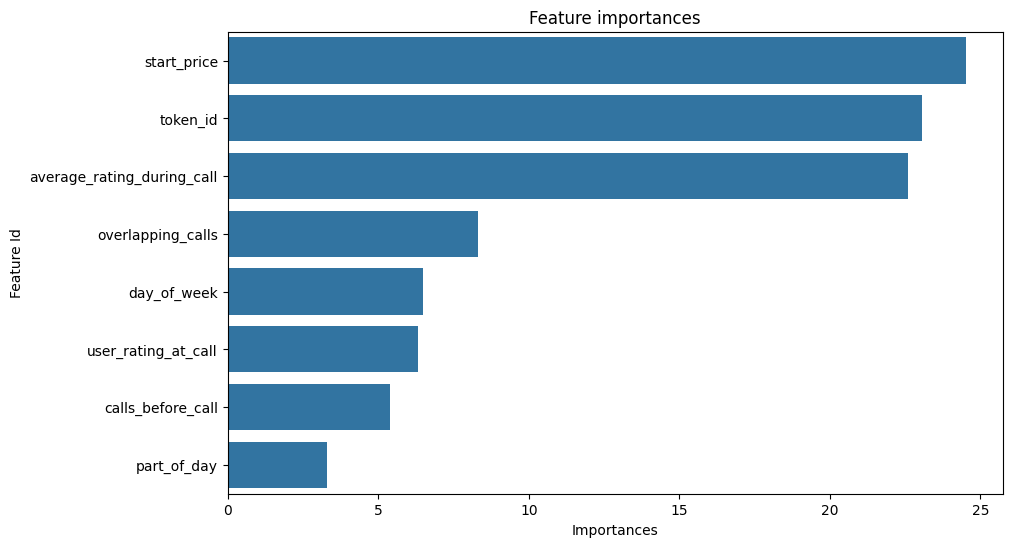

roc_auc_score:  0.6568097441864236
Precision: 0.2983606557377049
Recall: 0.5947712418300654
F1: 0.39737991266375544


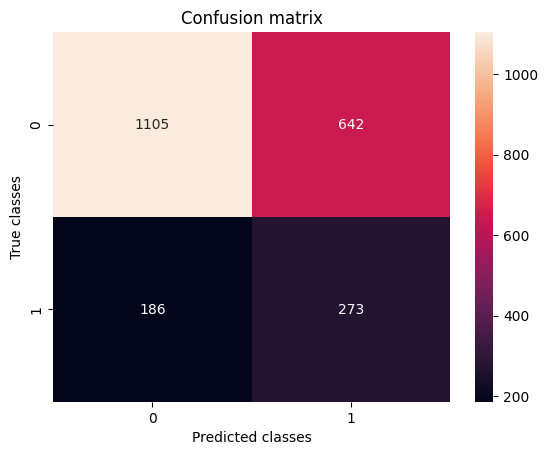

In [44]:
# check the accuracy of the model
print('Train accuracy:', model.score(X_train, y_train))
print('Test accuracy:', model.score(X_test, y_test))

# check the feature importances
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances)
# plot it
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_importances)
plt.title('Feature importances')
plt.show()


# rocauc
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)[:, 1]
print("roc_auc_score: ", roc_auc_score(y_test, probs))

# precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = model.predict(X_test)

print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

# confusion matrix
from sklearn.metrics import confusion_matrix
# plot it
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.title('Confusion matrix')
plt.show()


In [45]:
# save model
model.save_model('model/catboost_model.cbm')

In [46]:
import catboost

model = catboost.CatBoostClassifier()
model = model.load_model("model/catboost_model.cbm")

model.predict(X)

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
X.part_of_day.value_counts().index

Index(['Night', 'Morning', 'Afternoon', 'Evening'], dtype='object', name='part_of_day')

In [31]:
X.token_id.value_counts().index

Index([   1,  751,  320, 1169,   69,  454,  779, 3282,  105, 1586,
       ...
       4443, 4444, 4446, 4449, 4450, 4451, 4452, 4453, 4454, 3079],
      dtype='int64', name='token_id', length=5332)

In [35]:
X.iloc[0, :].values

array([4619, 0.0, 0.0, 3, 0.1073654406935741, 0.003963, 4, 'Evening'],
      dtype=object)